# Experimentos: Medida do período de um pêndulo simples

## Medição do período na aproximação de pequenos ângulos.


A medida deve ser feita para 4 comprimento diferentes. Note que o erro da media do comprimento $U_l$ é dado por:

$$
u_l=\frac{\Delta r}{\sqrt{3}} 
$$

mas como $\Delta r = 1,0$ mm, temos então que $u_l=0,58$ mm.


| Comprimento | Tamanho (mm) | Erro $u_l$  (mm) |
| :---------- | ------------ | ---------------- |
| $L_1$       | 700,00       | 0,58             |
| $L_2$       | 750,00       | 0,58             |
| $L_3$       | 800,00       | 0,58             |
| $L_4$       | 850,00       | 0,58             |

Para cada comprimento devemos medir 15 vezes o valor do período. Considerando $g=9.78$ m/s$^2$

 

| Medida ($L_1 = 700,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.4063  |
| 2                          | 1.4063  |
| ...                        | ...     |
| 14                         | 1.4063  |
| 15                         | 1.4063  |
| Média                      | 1.4063  |
| Desvio padrão              | 0       |



| Medida ($L_2 = 750,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.5069  |
| 2                          | 1.5069  |
| ...                        | ...     |
| 14                         | 1.5069  |
| 15                         | 1.5069  |
| Média                      | 1.5069  |
| Desvio padrão              | 0       |



| Medida ($L_3 = 800,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.6073  |
| 2                          | 1.6073  |
| ...                        | ...     |
| 14                         | 1.6073  |
| 15                         | 1.6073  |
| Média                      | 1.6073  |
| Desvio padrão              | 0       |



| Medida ($L_4 = 850,00$ mm) | Período |
| -------------------------- | ------- |
| 1                          | 1.7078  |
| 2                          | 1.7078  |
| ...                        | ...     |
| 14                         | 1.7078  |
| 15                         | 1.7078  |
| Média                      | 1.7078  |
| Desvio padrão              | 0       |


Solte o pêndulo de um ângulo menor ou igual a $10^{\circ}$, conforme ilustrado pela figura ao lado. Meça três vezes o período de uma oscilação completa com o cronômetro.

- **Período do pêndulo para  $L_1$ :** 1.4063 s
- **Período do pêndulo para  $L_2$ :** 1.5069 s
- **Período do pêndulo para  $L_3$ :** 1.6073 s
- **Período do pêndulo para  $L_4$ :** 1.7078 s


$$
\boxed{ T^2 =\frac{4\pi^2}{g} \ell} \qquad\qquad \text{ou} \qquad\qquad \boxed{ T = \sqrt{\frac{4\pi^2}{g} \ell} }
$$



| $N$  | $L$ (mm)  | $T$ (s) | $T^2$ (s$^2$) | $L\cdot T^2$ (m$\cdot$s$^2$) | $L^2$ (m$^2$) |
| ---- | :-------- | :------ | :------------ | :--------------------------- | :------------ |
| 1    | 700,00    | 1.4063  | 1.9777        | 1.3844                       | 0.4900        |
| 2    | 750,00    | 1.5069  | 2.2707        | 1.7030                       | 0.5625        |
| 3    | 800,00    | 1.6073  | 2.5834        | 2.0667                       | 0.6400        |
| 4    | 850,00    | 1.7078  | 2.9166        | 2.4791                       | 0.7225        |
| $\sum$ | 3100,00 | 6.2283  | 9.7484        | 7.6332                       | 2.4150        |


# Gerando os resultado experimentais 

Será necessário instalar a biblioteca 

```bash
sudo -H pip3 install scikit-learn
```
 
Para os usuários do Anaconda


```bash
conda install scikit-learn
```
 
Para os usuários do Anaconda



Para maiores detalhes sobre a biblioteca pandas veja:

- [Pandas](https://pandas.pydata.org/pandas-docs/stable/ecosystem.html)

- [scikit-learn](https://scikit-learn.org/stable/documentation.html)

- [Estatística Descritiva com Python](http://felipegalvao.com.br/blog/2016/03/31/estatistica-descritiva-com-python/)


In [1]:
# Importando as biblioteca a serem usada
import numpy as np                  # obtém acesso aos rápidos arrays da numpy 
import matplotlib.pyplot as plt     # Para fazer os gráficos das funções
import pandas as pd                 # Para ler e fazer as tabelas de dados
from sklearn.linear_model import LinearRegression  # Faz a regressão linear
# permite que se mostre os gráficos nesse ambiente
%matplotlib inline 

In [2]:
# Essa função gera um número aleatório
a = np.random.rand()
print(a)

0.059297467112726765


In [2]:
g=9.782
def periodo_rnd(l, taxa):
    aux = l*((4.0*np.pi*np.pi)/g)
    if np.random.rand() >= 0.50 :
        t = aux + taxa*aux*np.random.rand()
    else:
        t = aux - taxa*aux*np.random.rand()
    return np.sqrt(t)    

In [3]:
# Aqui vemos que há um resultado diferente toda vez que a função é chamada
tx =0.05
for x in range(0,10):
    print(periodo_rnd(0.7, tx))

1.7091449349247236
1.6802938065831585
1.711266850724171
1.7167873195416656
1.6400582683096236
1.6741680844504851
1.6897735406700611
1.6979656367090559
1.7221845437854808
1.6529488947363806


In [5]:
periodo_rnd(0.7,0.0)

1.680796206157556

Vamoas construir o primeiro conjunto de dados

In [6]:
# Tabela 1
n=15   # Número de medidas
L=0.7
tx=0.05
Nome = str('Tabela_L_')+str(int(L*1000))+'.dat'
f = open(Nome , 'w')
for i in range(1,n+1):
    linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
    f.write( linha )
f.close()

In [7]:
! cat Tabela_L_700.dat

1	1.6518753743078607
2	1.651926654976219
3	1.642190587605288
4	1.7126908825361051
5	1.6689871957659377
6	1.6926458428651416
7	1.6723212314201206
8	1.662759989148853
9	1.6467688898230455
10	1.6650077433191304
11	1.6485867282213704
12	1.6792222464976638
13	1.6866467666730782
14	1.6541308429149264
15	1.7215144982358541


In [8]:
# Remove o arquivo anterior
! rm -f Tabela_L_700.dat

In [9]:
# Gera tabela dat/csv sem cabeçalho
def gera_tab(n,L,tx):
    Nome = str('Tabela_L_')+str(int(L*1000))+'.csv'
    f = open(Nome , 'w')
    for i in range(1,n+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

In [10]:
# Tabela 2
gera_tab(15,0.75,0.05)

In [11]:
! cat Tabela_L_750.csv

1	1.7623439930838756
2	1.7567661325217478
3	1.721951883232439
4	1.773177171941971
5	1.754591256953523
6	1.7294604414664314
7	1.7652703380718013
8	1.7067944505129302
9	1.725237825818547
10	1.726998719360813
11	1.706914399252665
12	1.701227051487356
13	1.705759954258108
14	1.7039906177283206
15	1.7478767419851213


In [12]:
# Gerando Tabela 3
gera_tab(15,0.80,0.05)
# Gerando tabela 4
gera_tab(15,0.85,0.05)

In [13]:
! cat Tabela_L_800.csv

1	1.7744640441488906
2	1.7932752942623
3	1.8269151124732812
4	1.7988156271257263
5	1.7765663444193849
6	1.80566146351299
7	1.8340678794512848
8	1.7538056183382427
9	1.7959527937451176
10	1.8242259793510012
11	1.805253596564297
12	1.754002209583415
13	1.7580339990082674
14	1.8239787979069564
15	1.793308331962064


In [34]:
# Remove os arquivos anteriores
! rm -f Tabela_L_*.csv

In [4]:
# Tabela csv: acrescenta o cabeçalho
def gera_tabcsv(n,L,tx):
    Nome = str('Tabela_L_')+str(int(L*1000))+'.csv'
    f = open(Nome , 'w')
    linha='Medida ' + "\t" + "Período\n"
    f.write( linha )
    for i in range(1,n+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

In [16]:
#Gera tabela csv Com cabeçalho
gera_tabcsv(15,0.65,0.05)

In [17]:
! cat Tabela_L_650.csv

Medida 	Período
1	1.6490533975147394
2	1.6558184868772305
3	1.6370548646129506
4	1.6082438783031674
5	1.5972648735760144
6	1.6474532207667538
7	1.6577257634279374
8	1.5996356856441591
9	1.578938173117565
10	1.6587715026909762
11	1.6571254590796427
12	1.5997378075993198
13	1.6187986754079244
14	1.5949109398007206
15	1.5824315141859189


In [60]:
! rm -f Tabela_L_*.csv

A seguir mostramos como podemos fazer tudo junto:

In [61]:
# Vamos fazer tudo junto
N=50
tx=0.05
# Lista elas podem ser de ambas as formas, a primeira é mais geral
#Comp = [i/100 for i in range(70,95,5)]
Comp = [0.70, 0.75, 0.80, 0.85, 0.90]
for L in Comp:
    print("L = ", L)
    Nome='Tabela_L_'+str(int(L*1000))+'.csv'
    f = open(Nome, 'w')
    for i in range(1,N+1):
        linha = str(i)+"\t"+str(periodo_rnd(L,tx)) +"\n"
        f.write( linha )
    f.close()

L =  0.7
L =  0.75
L =  0.8
L =  0.85
L =  0.9


 Entretanto não estamos fazendo uso das funções criadas anteriormente, nesse caso teríamos

In [122]:
# Vamos remover todos os arquivos antes
! rm -f *.csv

In [123]:
# Vamos fazer tudo junto
N=50
tx=0.05
Comprimentos = [ i/100 for i in range(50,100,5) ]
for L in Comprimentos:
    print("L = ", L)
    gera_tabcsv(N,L,tx)

L =  0.5
L =  0.55
L =  0.6
L =  0.65
L =  0.7
L =  0.75
L =  0.8
L =  0.85
L =  0.9
L =  0.95


In [124]:
! rm -f Tabela_Final.csv

In [125]:
# Para obter todos os arquivos com extensão csv no diretório corrente
import glob, os
#Mudar o diretório caso seja necessário
#os.chdir("/IYPT")
Arqs=glob.glob('./*.csv')
print(Arqs)

['./Tabela_L_650.csv', './Tabela_L_950.csv', './Tabela_L_600.csv', './Tabela_L_800.csv', './Tabela_L_700.csv', './Tabela_L_900.csv', './Tabela_L_750.csv', './Tabela_L_850.csv', './Tabela_L_550.csv', './Tabela_L_500.csv']


In [126]:
# Vamos colocar em ordem crescente os arquivos
Arqs.sort()
print(Arqs)

['./Tabela_L_500.csv', './Tabela_L_550.csv', './Tabela_L_600.csv', './Tabela_L_650.csv', './Tabela_L_700.csv', './Tabela_L_750.csv', './Tabela_L_800.csv', './Tabela_L_850.csv', './Tabela_L_900.csv', './Tabela_L_950.csv']


In [127]:
# O número de arquivos encontrados é
print(len(Arqs))

10


In [128]:
# Vamos criar uma matriz numpy cujas as linhas 
# são o número de medidas e as colunas são o número de arquivos encontrados
nl = N
nc = len(Arqs)
MatP=np.zeros((nl,nc))  # Matriz com todas medidas dos períodos
Pmed = []   # Lista vazia para inserir os períodos médios
# Vamos iniciar o tratamento dos dados
i = 0
for arq in Arqs :
    TabL = pd.read_csv(arq, delimiter='\t')     # lê o conjunto de dados
    X1 = TabL.iloc[:, 0].values.reshape(-1, 1)  # valores convertidos em um array do numpy 
    T  = TabL.iloc[:, 1].values.reshape(-1, 1)  # -1 significa calcula a dimensão das linhas, mas tem uma 1 coluna
    MatP[:,i]= T[:,0]
    Pmed.append(TabL.mean(axis = 0)[1])         # Obtenho o período médio
    i = i + 1

In [129]:
print(Pmed)

[1.4165659553298757, 1.488759447916824, 1.5527362354405065, 1.619130560276968, 1.6839199425150462, 1.7404288850826592, 1.8003153076929994, 1.8481917046424154, 1.9005425704546122, 1.9616215341664383]


Precisamos da seguinte tabela:


| $N$  | $L$ (mm)  | $T$ (s) | $T^2$ (s$^2$) | $L\cdot T^2$ (m$\cdot$s$^2$) | $L^2$ (m$^2$) |
| ---- | :-------- | :------ | :------------ | :--------------------------- | :------------ |
| 1    | 700,00    | 1.4063  | 1.9777        | 1.3844                       | 0.4900        |
| 2    | 750,00    | 1.5069  | 2.2707        | 1.7030                       | 0.5625        |
| 3    | 800,00    | 1.6073  | 2.5834        | 2.0667                       | 0.6400        |
| 4    | 850,00    | 1.7078  | 2.9166        | 2.4791                       | 0.7225        |
| $\sum$ | 3100,00 | 6.2283  | 9.7484        | 7.6332                       | 2.4150        |


Vamos contruir ela

In [130]:
#Cria uma DataFrame com os daodos
Tab = {
       'N':[i for i in range(1,nc+1)],
       'L':Comprimentos,
       'T':Pmed,
       }
df = pd.DataFrame(Tab, columns=['N', 'L', 'T'] )

In [131]:
df

,N,L,T
0,1,0.50,1.416566
1,2,0.55,1.488759
2,3,0.60,1.552736
3,4,0.65,1.619131
4,5,0.70,1.683920
5,6,0.75,1.740429
6,7,0.80,1.800315
7,8,0.85,1.848192
8,9,0.90,1.900543
9,10,0.95,1.961622


In [132]:
df.describe()

,N,L,T
count,10.00000,10.000000,10.000000
mean,5.50000,0.725000,1.701221
std,3.02765,0.151383,0.181276
min,1.00000,0.500000,1.416566
25%,3.25000,0.612500,1.569335
50%,5.50000,0.725000,1.712174
75%,7.75000,0.837500,1.836223
max,10.00000,0.950000,1.961622


In [133]:
# Vamos adicionar as colunas que faltam:
df['T2']=df['T']**2
df['LT2'] = df['L']*df['T2']
df['L2'] = df['L']*df['L']

In [134]:
df

,N,L,T,T2,LT2,L2
0,1,0.50,1.416566,2.006659,1.003330,0.2500
1,2,0.55,1.488759,2.216405,1.219023,0.3025
2,3,0.60,1.552736,2.410990,1.446594,0.3600
3,4,0.65,1.619131,2.621584,1.704029,0.4225
4,5,0.70,1.683920,2.835586,1.984910,0.4900
5,6,0.75,1.740429,3.029093,2.271820,0.5625
6,7,0.80,1.800315,3.241135,2.592908,0.6400
7,8,0.85,1.848192,3.415813,2.903441,0.7225
8,9,0.90,1.900543,3.612062,3.250856,0.8100
9,10,0.95,1.961622,3.847959,3.655561,0.9025


In [135]:
# Fornece informações a respeito dos dados
df.describe()

,N,L,T,T2,LT2,L2
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,0.725000,1.701221,2.923729,2.203247,0.546250
std,3.02765,0.151383,0.181276,0.613305,0.890157,0.220338
min,1.00000,0.500000,1.416566,2.006659,1.003330,0.250000
25%,3.25000,0.612500,1.569335,2.463638,1.510953,0.375625
50%,5.50000,0.725000,1.712174,2.932340,2.128365,0.526250
75%,7.75000,0.837500,1.836223,3.372143,2.825808,0.701875
max,10.00000,0.950000,1.961622,3.847959,3.655561,0.902500


In [136]:
# Vamos exportar essa tabela organizada para um arquivo csv
Nome='Tabela_Final.csv'
df.to_csv(Nome, sep='\t')

In [137]:
! cat Tabela_Final.csv

	N	L	T	T2	LT2	L2
0	1	0.5	1.4165659553298757	2.0066591057996437	1.0033295528998218	0.25
1	2	0.55	1.488759447916824	2.2164046937616066	1.2190225815688838	0.30250000000000005
2	3	0.6	1.5527362354405065	2.410989816849956	1.4465938901099735	0.36
3	4	0.65	1.619130560276968	2.621583771222808	1.7040294512948253	0.42250000000000004
4	5	0.7	1.6839199425150462	2.8355863727998765	1.9849104609599133	0.48999999999999994
5	6	0.75	1.7404288850826592	3.0290927040300684	2.2718195280225513	0.5625
6	7	0.8	1.8003153076929994	3.241135207113739	2.592908165690991	0.6400000000000001
7	8	0.85	1.8481917046424154	3.4158125771090373	2.9034406905426815	0.7224999999999999
8	9	0.9	1.9005425704546122	3.6120620621102244	3.2508558558992022	0.81
9	10	0.95	1.9616215341664383	3.8479590433054907	3.655561091140216	0.9025


In [138]:
# Vamos calcular as somas:
SL=df['L'].sum()
SL2=df['L2'].sum()
SLT2=df['LT2'].sum()
ST2=df['T2'].sum()

In [139]:
A = (SL2*ST2-SL*SLT2)/(nc*SL2-SL*SL)
B = (nc*SLT2-SL*ST2)/(nc*SL2-SL*SL)
print(A, B)

-0.01296748952777169 4.050615206811059


A reta que estamos procurando erá:

$$
T^2 (L) = A + B*L
$$

In [140]:
# Vamos primeiro vfazer um ajuste com a scipy
from scipy.optimize import curve_fit

def Reta(t, a, b):
    return a + b*t 

In [141]:
l = np.array(Comprimentos)
p = df['T2'].to_numpy()
fitParams, fitCovariances = curve_fit(Reta, l, p)
print ('Coeficientes do ajuste: ', fitParams)
print ('Coeficientes da Regressão Linear): ', A, B)
print ('\nMatriz de Covariância:\n', fitCovariances)

Coeficientes do ajuste:  [-0.01296749  4.05061521]
Coeficientes da Regressão Linear):  -0.01296748952777169 4.050615206811059

Matriz de Covariância:
 [[ 0.00041109 -0.00054562]
 [-0.00054562  0.00075257]]


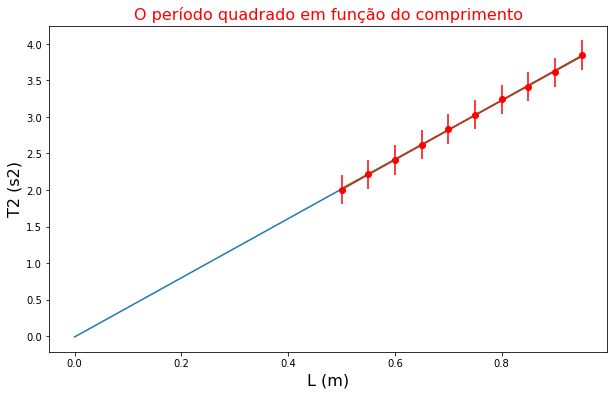

<Figure size 432x288 with 0 Axes>

In [142]:
largura = 10  # Largura da figura
altura  = 6   # Altura da figura
plt.figure(figsize =(largura, altura))     # Define o tamanho do gráfico
#plt.figure(figsize =(largura, altura), tight_layout=True)     # Define o tamanho do gráfico

plt.xlabel('L (m)', fontsize = 16)
plt.ylabel('T2 (s2)', fontsize = 16)
plt.title('O período quadrado em função do comprimento', fontsize=16, color='r')


ll = np.array( [ i/100 for i in range(0,100,5) ] )
#plt.xlim(0,1.0)
#plt.ylim(0,5.0)
# Faz o gráfico dos dados como círculos vermelhos e com barras de erro verticais
plt.errorbar(l, p, fmt = 'ro', yerr = 0.2)
# agora o gráfico da curva de melhor ajuste e também as curvas sigma +- 1 
# (A raiz quadrada do elemento da diagonal da matriz de covariância é a 
#  incerteza no parâmetro de ajuste.)
sigma = [np.sqrt(fitCovariances[0,0]), \
         np.sqrt(fitCovariances[1,1]) ]
plt.plot(ll, Reta(ll, fitParams[0], fitParams[1]), \
         l, Reta(l, fitParams[0], fitParams[1]),\
         l, Reta(l, fitParams[0] + sigma[0], fitParams[1] - sigma[1]),\
         l, Reta(l, fitParams[0] - sigma[0], fitParams[1] + sigma[1]),
         )
plt.show()
# Salvar um gráfico em um arquivo
plt.savefig('DataFitted.pdf', bbox_inches=0, dpi=600)

## <https://github.com/salvianoleao/IntroducaoJupyter>